In [1]:
%matplotlib notebook
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import operator

# 1. 打开文件并解析数据

In [2]:
filename = "datingTestSet.txt"
fr = open(filename)

In [3]:
# readlines()读取文件所有内容
array0Lines = fr.readlines()
print(array0Lines[0:2])
# 计算文件的行数
number0Lines = len(array0Lines)
print(number0Lines)

['40920\t8.326976\t0.953952\tlargeDoses\n', '14488\t7.153469\t1.673904\tsmallDoses\n']
1000


In [4]:
# 根据文件格式，初始化[1000,3]的零矩阵为特征矩阵
returnMat = np.zeros((number0Lines,3))
print(returnMat.shape)

(1000, 3)


In [5]:
# 构建分类标签矩阵
classLabelVector = []
# 将特征矩阵和标签矩阵的index初始化为0
index = 0

In [6]:
for line in array0Lines:
    # strip(rm)用于删除文件中的字符，rm为空时，默认删除空白符(包括'\n','\r','\t',' ')
    line = line.strip()
    #使用split('\t')将字符串根据'\t'分隔符进行切片
    listFromLines = line.split('\t')
    # 将数据前三列提取出来放入特征矩阵
    returnMat[index,:] = listFromLines[0:3]
    
    # 根据数据最后一列的标签值，设定1,2,3分别表示三类，构建标签矩阵
    if listFromLines[-1] == 'didntLike':
        classLabelVector.append(1)
    elif listFromLines[-1] == 'smallDoses':
        classLabelVector.append(2)
    elif listFromLines[-1] == 'largeDoses':
        classLabelVector.append(3)
    index += 1

In [7]:
datingDataMat = returnMat
print(datingDataMat[0:10])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]]


In [8]:
datingLabels = classLabelVector
print(datingLabels[0:10])

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3]


# 2. 可视化数据

In [9]:
pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


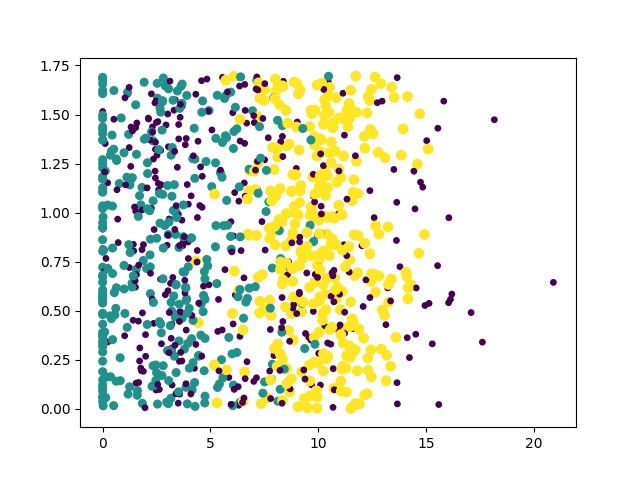

In [10]:
plt.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))

<IPython.core.display.Javascript object>


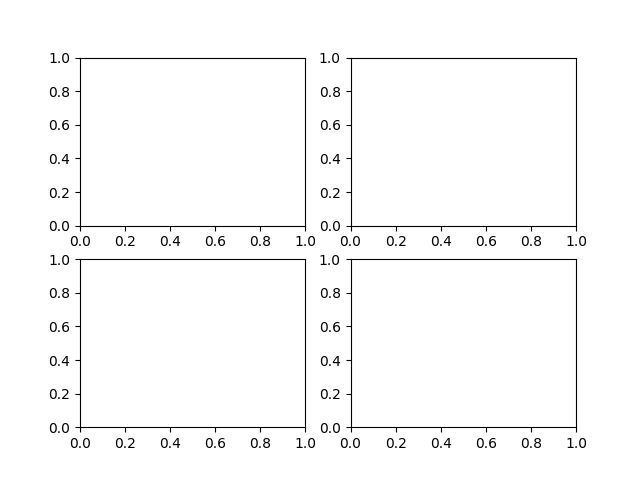

In [11]:
#将fig画布分隔成1行1列,不共享x轴和y轴
#当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False)

In [11]:
number0Labels = len(datingLabels)
print(number0Labels)

1000


In [12]:
LabelsColors = []
for i in datingLabels:
    if i == 1:
        LabelsColors.append('black')
    elif i == 2:
        LabelsColors.append('orange')
    elif i == 3:
        LabelsColors.append('red')
print(LabelsColors[0:10])

['red', 'orange', 'black', 'black', 'black', 'black', 'red', 'red', 'black', 'red']


In [20]:
# 绘制第一张图，以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0][0].scatter(x = datingDataMat[:,0], y = datingDataMat[:,1], color = LabelsColors, s = 15, alpha = .5)
axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
plt.setp(axs0_title_text, size=9, weight='bold', color='red')  
plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')  
plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black') 
#画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
#设置标题,x轴label,y轴label
axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
plt.setp(axs1_title_text, size=9, weight='bold', color='red')  
plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')  
plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black') 
#画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
#设置标题,x轴label,y轴label
axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
plt.setp(axs2_title_text, size=9, weight='bold', color='red')  
plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')  
plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black') 
#设置图例
didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                  markersize=6, label='smallDoses')
largeDoses = mlines.Line2D([], [], color='red', marker='.',
                  markersize=6, label='largeDoses')
#添加图例
axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
#显示图片
plt.show()

In [14]:
plt.show()

In [13]:
axs[0][0].scatter(x = datingDataMat[:,0], y = datingDataMat[:,1], color = LabelsColors, s = 15, alpha = .5)

NameError: name 'axs' is not defined

<IPython.core.display.Javascript object>


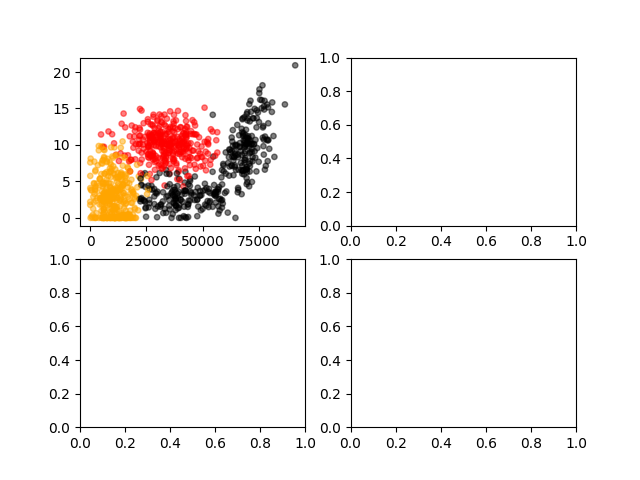

In [16]:
#将fig画布分隔成1行1列,不共享x轴和y轴
#当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
#font = FontProperties(fname=r"simsunb.ttf", size=14)
fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False)
# 绘制第一张图，以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0][0].scatter(x = datingDataMat[:,0], y = datingDataMat[:,1], color = LabelsColors, s = 15, alpha = .5)
#axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
#axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
#axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
plt.setp(axs0_title_text, size=9, weight='bold', color='red')  
plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')  
plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black') 
plt.show()

<IPython.core.display.Javascript object>


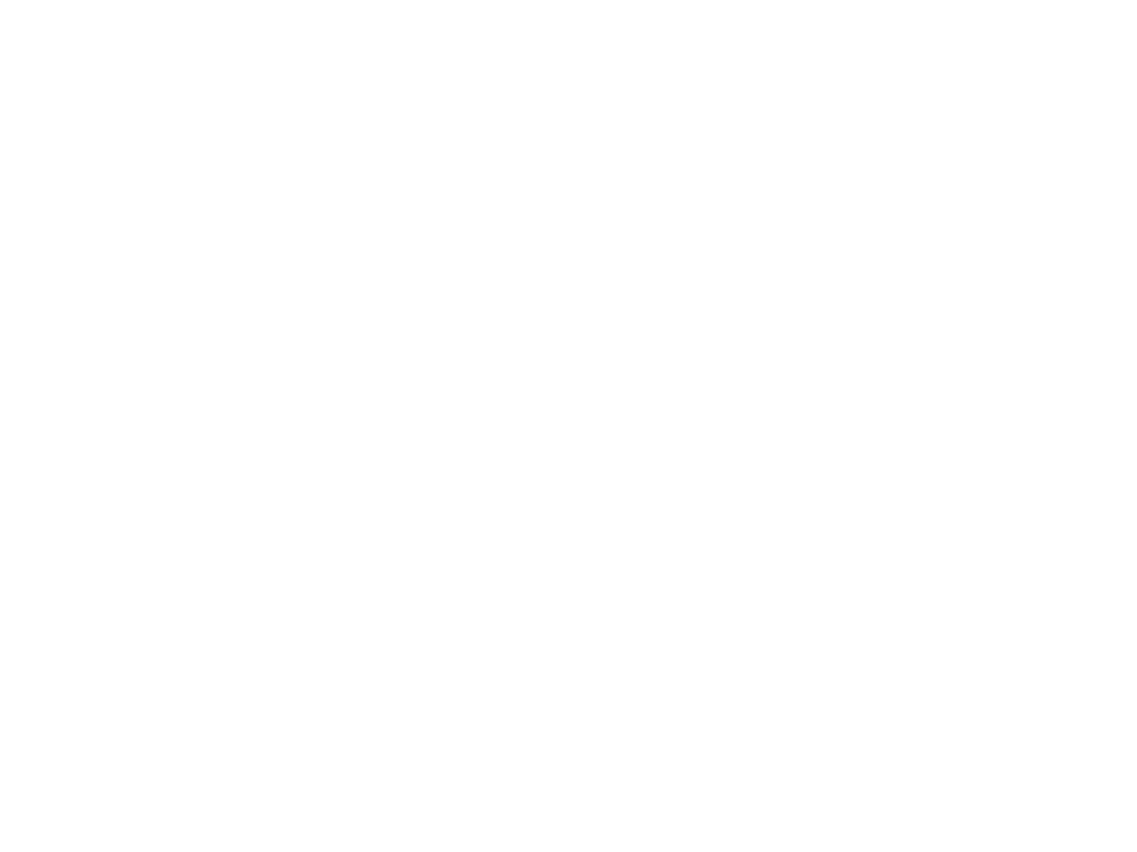

In [20]:
#将fig画布分隔成1行1列,不共享x轴和y轴
#当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False)
# 绘制第一张图，以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0][0].scatter(x = datingDataMat[:,0], y = datingDataMat[:,1], color = LabelsColors, s = 15, alpha = .5)
axs0_title_text = axs[0][0].set_title(u'game',FontProperties=font)

In [21]:
import matplotlib
print(matplotlib.matplotlib_fname())

/home/hu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
